In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.getOrCreate()

filepath = './data/dataset_site_info.parquet'
df = spark.read.parquet(filepath)

In [3]:
print('number of datasets =', df.select('dataset_name').distinct().count())

nodes_df = df.select('node_name').distinct()
print('number of T1-sites =', nodes_df.filter(nodes_df['node_name'].contains('T1')).count())
print('number of T2-sites =', nodes_df.filter(nodes_df['node_name'].contains('T2')).count())

number of datasets = 50746
number of T1-sites = 7
number of T2-sites = 55


In [4]:
num_rows = 10
df.limit(num_rows).toPandas()

,dataset_name,dataset_id,replica_time_create,node_name,rep_size,min_time,max_time,br_user_group_id,tier
0,/JetHT/Run2016B-21Feb2020_ver2_UL2016_HIPM-v1/AOD,1553410,20200619,T2_US_Purdue,2.570957e+10,2020-06-20,2020-12-31,42,AOD
1,/PAMinimumBias4/PARun2016C-PromptReco-v1/AOD,951505,20171015,T2_IN_TIFR,2.668056e+13,2019-01-01,2020-06-10,42,AOD
2,/GluGluToContinToZZTo2mu2nu_13TeV_MCFM701_pyth...,1114967,20200113,T2_FI_HIP,2.060427e+11,2020-01-14,2020-04-29,42,AODSIM
3,/WJetsToLNu_HT-70To100_TuneCP5_13TeV-madgraphM...,1247050,20200323,T2_US_Caltech,1.034198e+13,2020-03-23,2020-05-05,22,AODSIM
4,/HLTPhysics/Commissioning2017-PromptReco-v1/AOD,998897,20200212,T2_EE_Estonia,1.705387e+11,2020-02-13,2020-03-25,42,AOD
5,/SMS-T2bt-LLChipm_ctau-200_mLSP-1400_TuneCUETP...,1397254,20190925,T2_DE_DESY,1.866242e+11,2019-09-26,2020-12-31,22,AODSIM
6,/HIMinimumBiasReducedFormat3/HIRun2018-PromptR...,1233190,20181107,T2_US_Vanderbilt,1.077554e+09,2019-01-01,2020-12-31,42,AOD
7,/DYJetsToMuMu_M-50_TuneCP5_14TeV-madgraphMLM-p...,1560259,20200524,T1_RU_JINR_Disk,1.618496e+12,2020-06-06,2020-09-29,18,AODSIM
8,/DYJetsToTauTau_ForcedMuDecay_M-50_TuneCP5_13T...,1106693,20181003,T2_FR_IPHC,5.941757e+11,2019-01-01,2019-02-13,42,AODSIM
9,/TTGamma_Dilept_TuneCP5_PSweights_13TeV_madgra...,1148029,20180811,T1_RU_JINR_Disk,2.164409e+12,2019-01-01,2019-01-05,42,AODSIM


In [5]:
from cmSim.source.dataset import Dataset

dataset_df = df.filter(df['dataset_id'] == 1247050)
dataset = Dataset.from_rowslist(rowslist=dataset_df.collect())
print(dataset)

Dataset(name=/WJetsToLNu_HT-70To100_TuneCP5_13TeV-madgraphMLM-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/AODSIM, ID=1247050, format=AODSIM, totsize=10341.982[GB])


In [6]:
history_df = dataset.get_history_dataframe(freq='M')

num_rows = len(history_df)
history_df.head(n=num_rows)

node/site  number of data blocks  total data fraction
2019-01-31 0       T2_UK_London_IC                      3               0.0319
           1         T2_FR_CCIN2P3                      9               0.0196
           2            T2_IT_Bari                      6               0.0044
           3            T2_RU_JINR                      4               0.0057
           4        T2_FR_GRIF_LLR                      6               0.0274
           5            T2_DE_RWTH                      7               0.0164
           6       T1_US_FNAL_Disk                     43               0.8529
           7         T2_IT_Legnaro                     11               0.0499
           8            T2_US_UCSD                      2               0.0015
           9         T2_US_Caltech                      6               0.0626
           10      T1_IT_CNAF_Disk                      7               0.0483
           11        T2_US_Florida                      6               0.0317
           12  T2_UK_London_Brunel                      6               0.0056
           13       T1_DE_KIT_Disk                      6               0.0489
           14       T1_UK_RAL_Disk                      7               0.0204
           15         T2_ES_CIEMAT                      6               0.0247
           16         T2_PL_Swierk                      4               0.0015
           17      T1_RU_JINR_Disk                      9               0.0613
           18       T2_US_Nebraska                      3               0.0008
           19         T2_US_Purdue                      7               0.0800
           20    T2_UK_SGrid_RALPP                      7               0.0325
           21           T2_BE_IIHE                      4               0.0193
           22     T2_US_Vanderbilt                      4               0.0809
           23   T1_FR_CCIN2P3_Disk                      3               0.0020
           24      T2_FR_GRIF_IRFU                      4               0.0107
           25           T2_FR_IPHC                      6               0.0157
           26      T2_US_Wisconsin                      6               0.0772
2019-02-28 0        T1_UK_RAL_Disk                     11               1.0000
2019-03-31 0        T1_UK_RAL_Disk                     11               1.0000
2019-04-30 0        T1_UK_RAL_Disk                     11               1.0000
2019-05-31 0             T2_FI_HIP                      1               1.0000
2019-06-30 0             T2_FI_HIP                      1               1.0000
2019-07-31 0            T2_IT_Pisa                      1               1.0000
2019-09-30 0     T2_UK_SGrid_RALPP                      1               1.0000
2019-10-31 0     T2_UK_SGrid_RALPP                      1               1.0000
2019-11-30 0     T2_UK_SGrid_RALPP                      1               1.0000
2019-12-31 0             T2_US_MIT                      1               1.0000
           1     T2_UK_SGrid_RALPP                      1               1.0000
2020-01-31 0             T2_US_MIT                      1               1.0000
           1          T2_US_Purdue                      1               1.0000
           2      T2_PT_NCG_Lisbon                      1               1.0000
2020-03-31 0         T2_US_Caltech                      1               1.0000
2020-04-30 0         T2_US_Caltech                      1               1.0000
2020-07-31 0           T2_KR_KISTI                      1               1.0000
2020-08-31 0           T2_KR_KISTI                      1               1.0000
2020-09-30 0           T2_KR_KISTI                      1               1.0000
2020-10-31 0           T2_KR_KISTI                      1               1.0000
2020-11-30 0           T2_KR_KISTI                      1               1.0000
2020-12-31 0           T2_KR_KISTI                      1               1.0000

In [7]:
from cmSim.source.site import Site

site_df = df.filter(df['node_name'] == 'T1_IT_CNAF_Disk')
site = Site.from_rowslist(rowslist=site_df.collect())
print(site)

Site(name=T1_IT_CNAF_Disk, disk=None, cpu=None, tier=T1, country=IT)


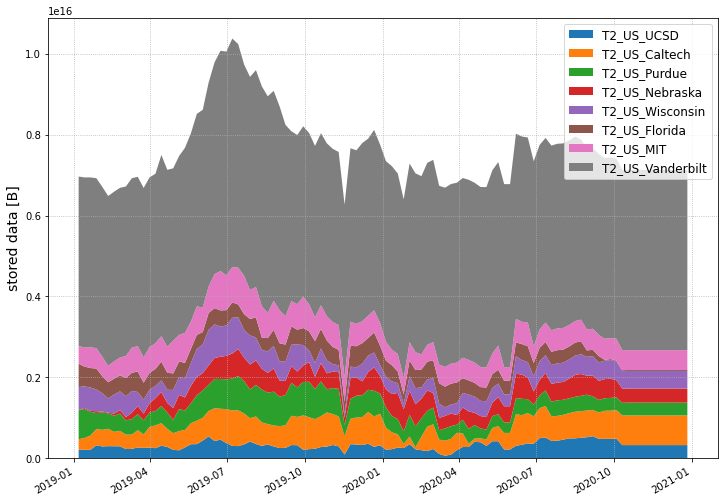

In [8]:
from cmSim.source.site import get_sites
from cmSim.plotting import plot_storage_history

aod_df = df.filter(df['tier'] == 'AOD')
sites = get_sites(df=aod_df, tier='T2', country='US')
plot_storage_history(sites, freq='W')